In [ ]:
import zipfile, pandas as pd
import os


# 🔹 Mount Google Drive once at the start

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# (Optional) Check Drive contents


In [ ]:
print(os.listdir("/content/drive/MyDrive"))

['Colab Notebooks', 'IMG-20250307-WA0012.jpg', 'My ', 'Aadhar card.pdf', 'Classroom', 'IMG-20230408-WA0028.jpg', 'Adobe Scan Aug 13, 2023.pdf', 'Adobe Scan Feb 14, 2024.pdf', 'answer .pdf', 'CERTIFICATES', 'CV_2024052600334950.pdf', 'CV.  Satwika (2).pdf', 'CV.  Satwika (1).pdf', 'CV.  Satwika.pdf', 'IMG_20240526_004702.jpg', 'CV_2024071416542317.pdf', 'Copy of Generic Template.gdoc', 'Satwika-1.pdf', 'CV Satwika..pdf', 'CV Satwika.....pdf', 'weatherApp', 'Satwika_Resume.pdf', 'IMG-20230615-WA0039.jpg', 'IMG_20250512_141143.jpg', 'IMG-20240411-WA0044.jpg', 'IMG-20250511-WA0005.jpg', 'IMG_20250512_141321.jpg', 'Satwika-3.pdf', 'IMG-20250606-WA0000.jpg', 'Gmail - 5th International Conference on Advancement in Electronics & Communication Engineering 2025  Submission (455) has been edited.pdf', '_Satwika (10) (1) (1).pdf', '_Satwika (10) (1).pdf', '_Satwika (10) (1) (2) (1).gdoc', '_Satwika (10) (1) (2).pdf', '_Satwika (10) (1) (2).gdoc', '_Satwika+(10)+(1)+(2).docx', '_Satwika+(10)+(1)+(2

In [ ]:
# 🔹 Path to your ZIP file in Google Drive
zip_path = "/content/drive/MyDrive/API_SP.POP.TOTL_DS2_en_csv_v2_1097358 (1).zip"

# 🔹 Extract the contents of the ZIP into /content/data
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/data")

# 🔹 Read CSV files
df = pd.read_csv("/content/data/API_SP.POP.TOTL_DS2_en_csv_v2_1097358.csv", sep=',', skiprows=4)
meta = pd.read_csv("/content/data/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_1097358.csv")

df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0,NaN


In [ ]:
# =========================
# Continue from here
# =========================

# 1) Keep only actual countries (remove aggregates like 'World', 'High income', etc.)
country_codes = set(meta[meta['Region'].notna() & (meta['Region']!='')]['Country Code'])
df_countries = df[df['Country Code'].isin(country_codes)].copy()

# 2) Select the year for analysis (2022 preferred)
year = '2022' if '2022' in df_countries.columns else df_countries.columns[-1]
print("Analyzing year:", year)

# Convert to numeric
df_countries[year] = pd.to_numeric(df_countries[year], errors='coerce')


Analyzing year: 2022


Histogram of populations (continuous variable)

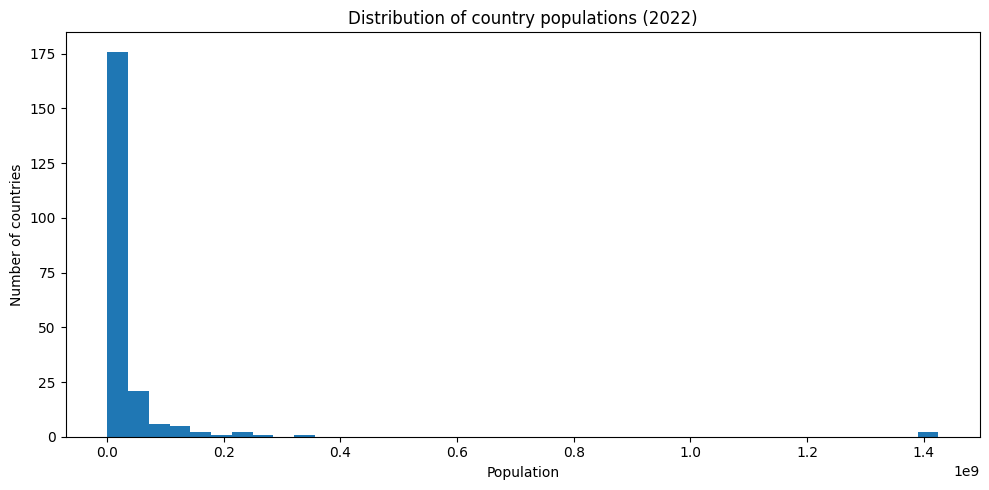

In [ ]:
import matplotlib.pyplot as plt

pop = df_countries[year].dropna()

plt.figure(figsize=(10,5))
plt.hist(pop, bins=40)
plt.title(f"Distribution of country populations ({year})")
plt.xlabel("Population")
plt.ylabel("Number of countries")
plt.tight_layout()
plt.show()


Bar chart of population brackets (categorical variable)

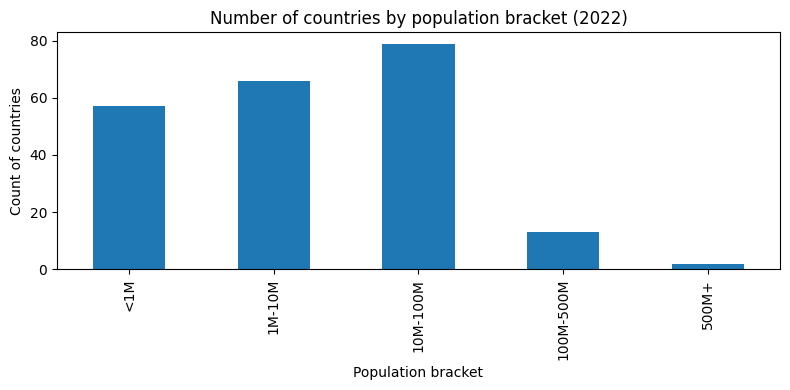

In [ ]:
bins = [0, 1e6, 1e7, 1e8, 5e8, 1.5e9]
labels = ['<1M', '1M-10M', '10M-100M', '100M-500M', '500M+']
cats = pd.cut(pop, bins=bins, labels=labels)
counts = cats.value_counts().sort_index()

plt.figure(figsize=(8,4))
counts.plot(kind='bar')
plt.title(f"Number of countries by population bracket ({year})")
plt.xlabel("Population bracket")
plt.ylabel("Count of countries")
plt.tight_layout()
plt.show()


Top 15 countries by population

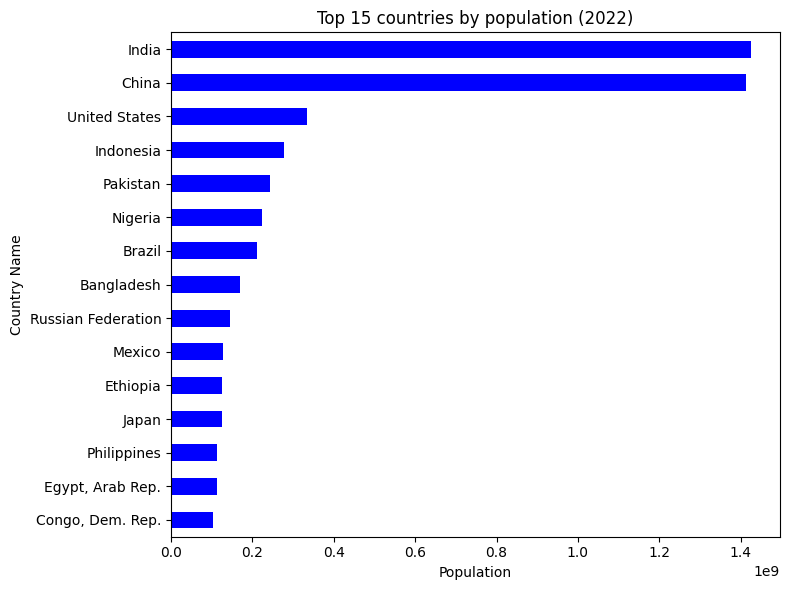

In [ ]:
top15 = df_countries[['Country Name', year]].sort_values(by=year, ascending=False).head(15).set_index('Country Name')

plt.figure(figsize=(8,6))
top15[year].plot(kind='barh', color='blue')
plt.gca().invert_yaxis()
plt.title(f"Top 15 countries by population ({year})")
plt.xlabel("Population")
plt.tight_layout()
plt.show()


subplotting


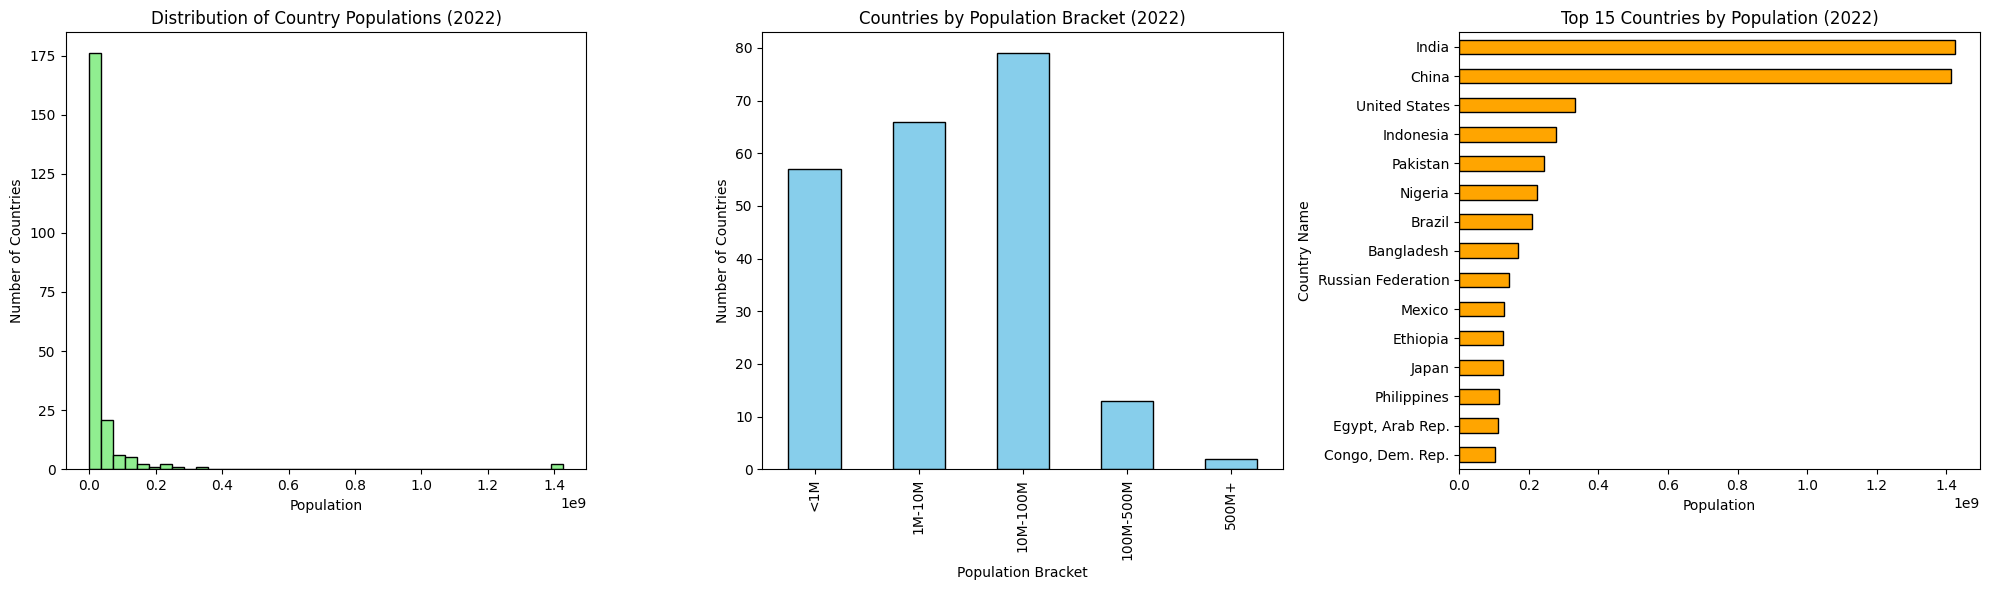

In [ ]:
# ==============================
# Combined Plots (All in one figure)
# ==============================
import matplotlib.pyplot as plt

pop = df_countries[year].dropna()

# Create 1 row, 3 columns of plots
fig, axes = plt.subplots(1, 3, figsize=(20,6))

# 1. Histogram
axes[0].hist(pop, bins=40, color='lightgreen', edgecolor='black')
axes[0].set_title(f"Distribution of Country Populations ({year})")
axes[0].set_xlabel("Population")
axes[0].set_ylabel("Number of Countries")

# 2. Population Brackets
bins = [0, 1e6, 1e7, 1e8, 5e8, 1.5e9]
labels = ['<1M', '1M-10M', '10M-100M', '100M-500M', '500M+']
cats = pd.cut(pop, bins=bins, labels=labels)
counts = cats.value_counts().sort_index()

counts.plot(kind='bar', ax=axes[1], color='skyblue', edgecolor='black')
axes[1].set_title(f"Countries by Population Bracket ({year})")
axes[1].set_xlabel("Population Bracket")
axes[1].set_ylabel("Number of Countries")

# 3. Top 15 Countries
top15 = df_countries[['Country Name', year]].sort_values(by=year, ascending=False).head(15).set_index('Country Name')
top15[year].plot(kind='barh', ax=axes[2], color='orange', edgecolor='black')
axes[2].invert_yaxis()
axes[2].set_title(f"Top 15 Countries by Population ({year})")
axes[2].set_xlabel("Population")

# Adjust layout so titles don’t overlap
plt.tight_layout()
plt.show()
